# Exploring DC Images Metadata

In this notebbok, we will be working with the Library of Congress's Free to Use and Reuse Photo Collection metadata. We will isolate the photographs that have DC as a subject, and visualize the metadata of the "DC set" we create.

Some of the goals of this notebook: identify which metadata categories contain relevant and interesting information. Understand the nature of the image collection. Find patterns in the metadata of Library DC images.

Let's begin with some imports.

In [2]:
#importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#assigns file path for the image data
image_data = "metadata.csv"

## Part 1: The DataFrame

Let's create a Pandas DataFrame using the metadata.csv file and explore the contents.

Then, we'll create a DataFrame with only our DC images included.

In [41]:
df = pd.read_csv(image_data, header = 0)
df.head() #taking a quick look at the structure of the Data Frame

,Call_number,Contributors,Date_text,Date,Digitized,Set,Genre,Id,IIIF_manifest,Preview_url,...,Location_Osm_url,Location_Latitude,Location_Longitude,Location_County,Location_State_district,Location_State,Location_Country,METSXML Record,Other_title,MODSXML Record
0,"LOT 14043-2, no. 1060 [P&P]","Lenthall, H. (Henry), 1820-1897, photographer....","[ca. 1856, printed between 1862 and 1877]",1862,True,Nurses-And-Nursing,Albumen prints--1860-1880 | Cartes de visite--...,http://www.loc.gov/item/2018653939/,http://www.loc.gov/item/2018653939/manifest.json,https://tile.loc.gov/storage-services/service/...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LC-USF34- 046569-E [P&P] LOT 1548 (correspondi...,"Delano, Jack, 1914-1997, photographer.",1941 Oct.,1941,True,Nurses-And-Nursing,Nitrate negatives,http://www.loc.gov/item/2017796981/,http://www.loc.gov/item/2017796981/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/1800720...,39.3573664 | 33.5492988 | 41.6809707 | 39.7837304,-90.3898985 | -83.1660939 | 44.0287382 | -100....,Greene County | Greene County | Unknown | Unknown,Unknown | Unknown | Unknown | Unknown,Illinois | Georgia | Unknown | Unknown,United States | United States | Georgia | Unit...,NaN,NaN,NaN
2,LC-A6195- 519-Ax [P&P],Unknown,1919 [date published],1919,True,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017667969/,http://www.loc.gov/item/2017667969/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/365331,42.6384261,12.674297,Unknown,Unknown,Unknown,Italy,NaN,NaN,NaN
3,"POS - WWI - US, no. 120 (C size) [P&P]","Grant, Gordon, 1875-1962, artist.",[between 1914 and 1918],1914,True,Nurses-And-Nursing,NaN,http://www.loc.gov/item/00652153/,http://www.loc.gov/item/00652153/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838,39.7837304,-100.445882,Unknown,Unknown,Unknown,United States,NaN,NaN,NaN
4,Illus. in E492.94 33d T (Case X) [P&P] Copy 2,Unknown,1902 [from a photograph taken between 1862 and...,1902,True,Nurses-And-Nursing,Portrait photographs--1900-1910 | Book illustr...,http://www.loc.gov/item/2018663038/,http://www.loc.gov/item/2018663038/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838,39.7837304,-100.445882,Unknown,Unknown,Unknown,United States,NaN,NaN,NaN


In [5]:
df.columns #looking at the column names for categories of interest

Index(['Call_number', 'Contributors', 'Date_text', 'Date', 'Digitized', 'Set',
       'Genre', 'Id', 'IIIF_manifest', 'Preview_url', 'Index', 'Description',
       'Creators_names', 'Creators_roles', 'Type_of_resource', 'MODS Record',
       'MARCXML Record', 'MARC Record', 'Dublin Core Record', 'Rights',
       'Source_collection', 'Language', 'Lccn', 'Medium', 'Mime_type', 'Notes',
       'Online_format', 'Original_format', 'Part_of', 'Repository',
       'Number_of_files', 'Shelf_id', 'Subjects', 'Subject_headings',
       'Last_updated_in_api', 'Title', 'Url', 'Location_text',
       'Location_Short_name', 'Location_Full_name', 'Location_Osm_url',
       'Location_Latitude', 'Location_Longitude', 'Location_County',
       'Location_State_district', 'Location_State', 'Location_Country',
       'METSXML Record', 'Other_title', 'MODSXML Record'],
      dtype='object')

In [6]:
for item in df['Location_text'].unique():
    print(item)

nan
Georgia--Greene County | Georgia | Greene County | United States
Italy
United States
New York | New York (State) | New York (State)--New York | United States
Illinois--Herrin | Illinois | Herrin | United States
Illinois | Chicago | United States | Illinois--Chicago
Pennsylvania | Philadelphia | United States
Belgium | Belgium--Brussels | Brussels
Washington (D.C.) | Washington D.C.
Washington (D.C.) | Washington D.C. | United States
Japan
Montenegro--Podgoritza | Podgoritza | Montenegro
Washington (D.C.) | Washington D.C. | District Of Columbia | District of Columbia--Washington (D.C.) | United States
Virginia | Virginia--Arlington | Arlington | United States
Israel--Nejd | Nejd | Israel
New York | New York (State)
Cook County | Illinois | Chicago | Illinois--Cook County--Chicago | United States
Maryland | Maryland--Baltimore | Baltimore | United States
California--Manzanar | Manzanar | California
New Mexico--Taos County--Penasco | New Mexico | Penasco | United States | Taos County

Now that we've familiarized ourselves with the Data Frame, let's isolate the DC images' metadata in a new Data Frame.

In [42]:
df_dc_set = df[df['Location_text'].str.contains('D.C.') == True]
print(df_dc_set.shape) #understanding how many DC images have been collected
df_dc_set.head() #checking that the structure of the Data Frame is as expected

(158, 50)


,Call_number,Contributors,Date_text,Date,Digitized,Set,Genre,Id,IIIF_manifest,Preview_url,...,Location_Osm_url,Location_Latitude,Location_Longitude,Location_County,Location_State_district,Location_State,Location_Country,METSXML Record,Other_title,MODSXML Record
14,LC-U9- 23723-23 [P&P],"Leffler, Warren K., photographer.",1971 Jan. 5.,1971,True,Nurses-And-Nursing,NaN,http://www.loc.gov/item/2012647959/,http://www.loc.gov/item/2012647959/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/5396194,38.8950368,-77.0365427,Unknown,Unknown,District of Columbia,United States,NaN,NaN,NaN
15,"LOT 14043-2, no. 1308 [P&P]",Unknown,Aug. 1865,1865,True,Nurses-And-Nursing,Stereographs--1860-1870 | Albumen prints--1860...,http://www.loc.gov/item/2019630777/,http://www.loc.gov/item/2019630777/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838 ...,39.7837304 | 38.8950368,-100.445882 | -77.0365427,Unknown | Unknown,Unknown | Unknown,Unknown | District of Columbia,United States | United States,NaN,NaN,NaN
25,LC-A6195- 9976 [P&P],Unknown,16 March 1920 [date received],1920,True,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017671677/,http://www.loc.gov/item/2017671677/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838 ...,39.7837304 | 38.89384735 | 38.8950368,-100.445882 | -76.98804281910948 | -77.0365427,Unknown | Unknown | Unknown,Unknown | Unknown | Unknown,Unknown | District of Columbia | District of C...,United States | United States | United States,NaN,NaN,NaN
87,LC-H261- 6424 [P&P],"Harris & Ewing, photographer.",1916.,1916,True,Birthdays,Glass negatives,http://www.loc.gov/item/2016866957/,http://www.loc.gov/item/2016866957/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838 ...,39.7837304 | 38.89384735 | 38.8950368,-100.445882 | -76.98804281910948 | -77.0365427,Unknown | Unknown | Unknown,Unknown | Unknown | Unknown,Unknown | District of Columbia | District of C...,United States | United States | United States,NaN,NaN,NaN
91,LC-H832- 3031-x [P&P],Unknown,ca. 1920-ca. 1950.,1920,True,Birthdays,NaN,http://www.loc.gov/item/2019681158/,http://www.loc.gov/item/2019681158/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/5396194,38.8950368,-77.0365427,Unknown,Unknown,District of Columbia,United States,NaN,NaN,NaN


In [8]:
df_dc_set.columns #looking at the columns again to see which to keep

Index(['Call_number', 'Contributors', 'Date_text', 'Date', 'Digitized', 'Set',
       'Genre', 'Id', 'IIIF_manifest', 'Preview_url', 'Index', 'Description',
       'Creators_names', 'Creators_roles', 'Type_of_resource', 'MODS Record',
       'MARCXML Record', 'MARC Record', 'Dublin Core Record', 'Rights',
       'Source_collection', 'Language', 'Lccn', 'Medium', 'Mime_type', 'Notes',
       'Online_format', 'Original_format', 'Part_of', 'Repository',
       'Number_of_files', 'Shelf_id', 'Subjects', 'Subject_headings',
       'Last_updated_in_api', 'Title', 'Url', 'Location_text',
       'Location_Short_name', 'Location_Full_name', 'Location_Osm_url',
       'Location_Latitude', 'Location_Longitude', 'Location_County',
       'Location_State_district', 'Location_State', 'Location_Country',
       'METSXML Record', 'Other_title', 'MODSXML Record'],
      dtype='object')

There are a lot of columns! For our purposes, we'll be dropping about half of these columns to focus on columns of more interest, such as the Contributors, Subjects, and Set columns.

In [9]:
to_drop = ['Call_number','Date_text', 'Digitized', 'Id', 'IIIF_manifest', 'Preview_url', 'Index', 
           'Creators_names', 'Creators_roles', 'MODS Record', 'MARCXML Record', 'MARC Record', 'Dublin Core Record',
           'Rights', 'Lccn', 'Mime_type', 'Notes', 'Online_format', 'Shelf_id', 'Number_of_files', 'Last_updated_in_api',
           'Url', 'Location_text', 'Location_Short_name', 'Location_Full_name', 'Location_Osm_url','Location_Latitude', 'Location_Longitude',
           'Location_County', 'Location_State_district', 'Location_State', 'Location_Country', 'METSXML Record',
           'Other_title', 'MODSXML Record']

df_dc_set = df_dc_set.drop(columns = to_drop, axis = 1)

Let's take a look at which columns we have left to explore.

In [10]:
df_dc_set.columns

Index(['Contributors', 'Date', 'Set', 'Genre', 'Description',
       'Type_of_resource', 'Source_collection', 'Language', 'Medium',
       'Original_format', 'Part_of', 'Repository', 'Subjects',
       'Subject_headings', 'Title'],
      dtype='object')

In [43]:
print(df_dc_set.shape)
df_dc_set.head()

(158, 50)


,Call_number,Contributors,Date_text,Date,Digitized,Set,Genre,Id,IIIF_manifest,Preview_url,...,Location_Osm_url,Location_Latitude,Location_Longitude,Location_County,Location_State_district,Location_State,Location_Country,METSXML Record,Other_title,MODSXML Record
14,LC-U9- 23723-23 [P&P],"Leffler, Warren K., photographer.",1971 Jan. 5.,1971,True,Nurses-And-Nursing,NaN,http://www.loc.gov/item/2012647959/,http://www.loc.gov/item/2012647959/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/5396194,38.8950368,-77.0365427,Unknown,Unknown,District of Columbia,United States,NaN,NaN,NaN
15,"LOT 14043-2, no. 1308 [P&P]",Unknown,Aug. 1865,1865,True,Nurses-And-Nursing,Stereographs--1860-1870 | Albumen prints--1860...,http://www.loc.gov/item/2019630777/,http://www.loc.gov/item/2019630777/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838 ...,39.7837304 | 38.8950368,-100.445882 | -77.0365427,Unknown | Unknown,Unknown | Unknown,Unknown | District of Columbia,United States | United States,NaN,NaN,NaN
25,LC-A6195- 9976 [P&P],Unknown,16 March 1920 [date received],1920,True,Nurses-And-Nursing,Glass negatives,http://www.loc.gov/item/2017671677/,http://www.loc.gov/item/2017671677/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838 ...,39.7837304 | 38.89384735 | 38.8950368,-100.445882 | -76.98804281910948 | -77.0365427,Unknown | Unknown | Unknown,Unknown | Unknown | Unknown,Unknown | District of Columbia | District of C...,United States | United States | United States,NaN,NaN,NaN
87,LC-H261- 6424 [P&P],"Harris & Ewing, photographer.",1916.,1916,True,Birthdays,Glass negatives,http://www.loc.gov/item/2016866957/,http://www.loc.gov/item/2016866957/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/148838 ...,39.7837304 | 38.89384735 | 38.8950368,-100.445882 | -76.98804281910948 | -77.0365427,Unknown | Unknown | Unknown,Unknown | Unknown | Unknown,Unknown | District of Columbia | District of C...,United States | United States | United States,NaN,NaN,NaN
91,LC-H832- 3031-x [P&P],Unknown,ca. 1920-ca. 1950.,1920,True,Birthdays,NaN,http://www.loc.gov/item/2019681158/,http://www.loc.gov/item/2019681158/manifest.json,https://tile.loc.gov/storage-services/service/...,...,https://www.openstreetmap.org/relation/5396194,38.8950368,-77.0365427,Unknown,Unknown,District of Columbia,United States,NaN,NaN,NaN


## Exploring and Visualizing the Metadata

We have 15 potential categories left to explore : 'Contributors', 'Date', 'Set', 'Genre', 'Description', 'Type_of_resource', 'Source_collection', 'Language', 'Medium', 'Original_format', 'Part_of', 'Repository', 'Subjects', 'Subject_headings', and 'Title'.

Some of these columns might need transformations to make the data easier to work with. Some will be best represented as simple graphs, while we might opt for word clouds for others. Let's get started!

We'll begin with the "Contributors" column.

In [12]:
#Understanding the structure of the data

for contributor in df_dc_set['Contributors'].unique():
    print(contributor)

print(df_dc_set['Contributors'].nunique())

Leffler, Warren K., photographer.
Unknown
Harris & Ewing, photographer.
Parks, Gordon, 1912-2006, photographer.
Jackson, William Henry, 1843-1942, photographer. | Detroit Publishing Co., copyright claimant, publisher.
Johnston, Frances Benjamin, 1864-1952, photographer.
Bubley, Esther, photographer.
Clinedinst, Barnett McFee, 1862-1953, photographer.
Highsmith, Carol M., 1946- photographer.
Frissell, Toni, 1907-1988, photographer.
Horydczak, Theodor, approximately 1890-1971, photographer.
Jenkins, R. Michael, photographer.
Walter, Thomas Ustick, 1804-1887. | Bien, Julius, 1826-1909
Palmer, Alfred T., photographer.
Library of Congress. Photoduplication Service, photographer.
L'Enfant, Pierre Charles, 1754-1825. | United States. Commissioner of Public Buildings.
L'Enfant, Pierre Charles, 1754-1825. | Thackara & Vallance.
Bengough, William, 1863-1932, artist.
Detroit Photographic Co.
Library of Congress. Map Division.
Bishop, Cortlandt F. (Cortlandt Field), 1870-1935, former owner. | Cath

That's a lot of contributors! Let's get a sense of who contributed how much to our DC set. 

But first, we have a few contributors that are double-listed, and some messy and long lines of text. Let's standardize the data a little bit. To do this, we'll briefly move the data to a spreadsheet and adjust it there.

In [13]:
df_dc_set.to_csv('dc_set.csv')

In the spreadsheet, we adjusted the data by keeping only the Contributor's name in the Contributors column, and selecting the first contributor, the photographer/artist, and removing owners if multiple contributors were included in the column. We also added a Contributor_type column to keep track of the contributor's role, and combined "nan" and "Unknown" values to just "Unknown".

Now that we've standardized the data, let's reload it in and take a closer look.

In [44]:
df_dc_set = pd.read_csv("dc_set_updated.csv", header = 0)
df_dc_set.head()

,Unnamed: 0,Contributors,Contributor_type,Date,Set,Genre,Description,Type_of_resource,Source_collection,Language,Medium,Original_format,Part_of,Repository,Subjects,Subject_headings,Title
0,14,"Leffler, Warren K",Photographer,1971,Nurses-And-Nursing,NaN,NaN,Still image,NaN,English,1 negative : film.,"Photo, print, drawing",prints and photographs division | catalog,Library of Congress Prints and Photographs Div...,film negatives | washington (d.c.) | drug abus...,Clinics--Washington (D.C.)--1970-1980 | Drug a...,[A nurse hands a cup of methadone to a man in ...
1,15,Unknown,NaN,1865,Nurses-And-Nursing,Stereographs--1860-1870 | Albumen prints--1860...,"Photograph shows Dorothea L. Dix, Superintende...",Still image,Liljenquist Family collection (Library of Cong...,English,1 photograph : albumen print on card mount ; m...,"Photo, print, drawing",lot 14043 | prints and photographs division | ...,Library of Congress Prints and Photographs Div...,washington (d.c.) | history | women | union | ...,"Nurses--Washington (D.C.)--1860-1870 | Dix, Do...","Miss D.L. Dix, Washington, D.C."
2,25,Unknown,NaN,1920,Nurses-And-Nursing,Glass negatives,NaN,Still image,American National Red Cross photograph collect...,English,1 negative : glass ; 5 x 7 in.,"Photo, print, drawing",prints and photographs division | catalog,Library of Congress Prints and Photographs Div...,washington (d.c.) | united states | american r...,United States--District of Columbia--Washingto...,Eye Tray. Army Training School for Nurses. Wal...
3,87,Harris & Ewing,Photographer,1916,Birthdays,Glass negatives,"Photo shows Gertrude Crocker (right, wearing w...",Still image,Harris & Ewing photograph collection,English,1 negative : glass ; 5 x 7 in. or smaller,"Photo, print, drawing",prints and photographs division | catalog | ha...,Library of Congress Prints and Photographs Div...,district of columbia | united states | washing...,United States--District of Columbia--Washingto...,WOMAN SUFFRAGE. BIRTHDAY CAKE
4,91,Unknown,NaN,1920,Birthdays,NaN,NaN,Unspecified,Horydczak photograph collection (Library of Co...,English,1 negative : glass ; 5 x 7 in.,"Photo, print, drawing",prints and photographs division | horydczak co...,Library of Congress Prints and Photographs Div...,washington (d.c.) | portrait photographs | gro...,United States--District of Columbia--Washingto...,Theodor Horydczak and family. Norma Horydczak ...


Let's use a worldcloud to see which contributors show up most frequently in our set!

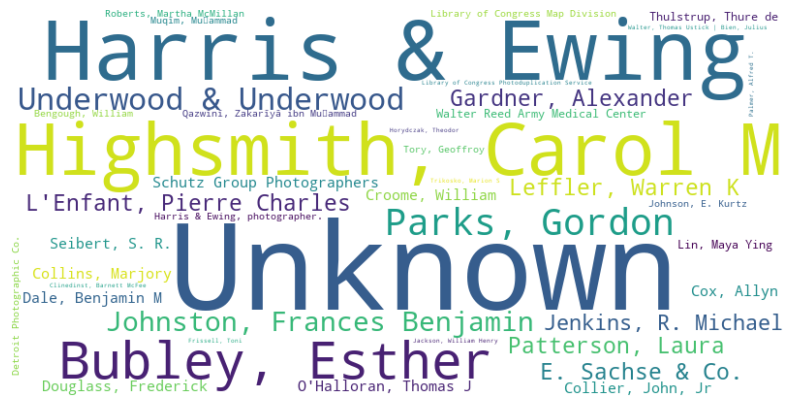

In [45]:
contributor_counts = df_dc_set['Contributors'].value_counts() #saves the number of times each contributor appears for the word count

contributor_freq = {contributor: count for contributor, count in zip(contributor_counts.index, contributor_counts.values)} #saves frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(contributor_freq) #creates the wordcloud

plt.figure(figsize=(10, 8)) #size of the word cloud
plt.imshow(wordcloud, interpolation='bilinear') #adjusts appearance of word cloud
plt.axis('off') #removes axis
plt.show()


Aside from Unknown, we can see that the most frequent contributors to our DC set are Carol M Highsmith, Harris & Ewing, and Esther Bubley. What about the contributor types?

Here, let's use a pie chart for a simpler visualization.

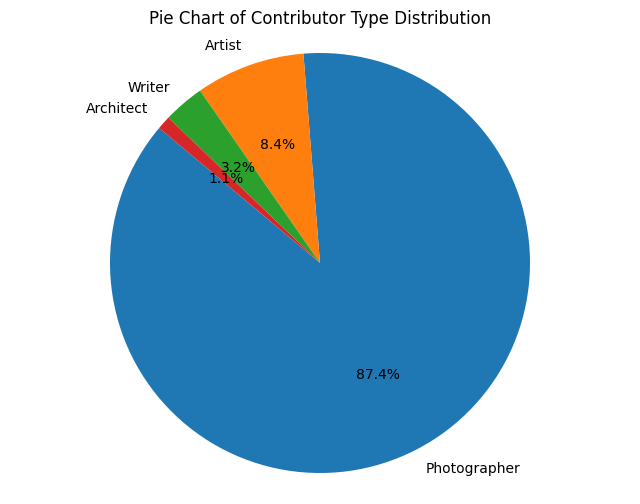

In [46]:
contributor_type_counts = df_dc_set['Contributor_type'].value_counts() #collects the value counts for the pie chart
plt.figure(figsize=(8, 6)) #size of the figure
plt.pie(contributor_type_counts, labels=contributor_type_counts.index, autopct='%1.1f%%', startangle=140) #creates the pie chart
plt.title('Pie Chart of Contributor Type Distribution')
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The vast majority are photographers, but we can see that we also have some artists, from print/cartographic pieces, some writers from digitzed manuscripts, and even an architect!

### Dates

Let's move on to exploring the dates of our collection. First, we'll have to clean and standardize the data to save only the year of each image.

In [47]:
# Convert "NaN" strings to NaN values
df_dc_set["Date"] = df_dc_set["Date"].replace("NaN", pd.NA)
df_dc_set_adj = df_dc_set.dropna(subset=["Date"])
# Convert date strings to numeric format
for index, row in df_dc_set_adj.iterrows():
    date_str = str(row["Date"])  
    if len(date_str) == 4:
        df_dc_set_adj.at[index, "Date"] = int(date_str)  # Convert YYYY to int
    elif "-" in date_str:
        df_dc_set_adj.at[index, "Date"] = int(date_str[:4])  # Extract YYYY from YYYY-MM-DD
    else:
        # Assume last 4 characters represent year in "text text YYYY" format
        df_dc_set_adj.at[index, "Date"] = int(date_str[-4:])

print(df_dc_set_adj["Date"].unique()) #checking on whether the dates have been properly cleaned

[1971 1865 1920 1916 1942 1938 1902 1899 1909 1943 2007 1957 1939 1937
 1980 1930 1990 1929 1918 1923 2010 1989 1860 2000 1791 1794 1790 1933
 1968 1921 2018 1926 1524 1565 1650 1941 2008 1919 1913 1871 1884 1888
 1932 1915 1935 1851 1792 1890 1922 1924 1963 1972 1960 1991 1936 1996
 1994 1973 1849 1853 1873 1885 1889 1897 1905 1925 1949 1945 1961 1965
 1969 1977 1981 1997 2009 1927]


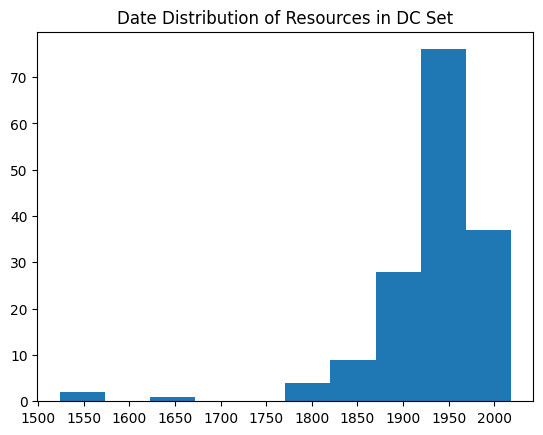

In [49]:
plt.hist(df_dc_set_adj["Date"]) #plotting the histogram
plt.xticks(np.arange(1500, 2001, 50)) #fixing the axis tick marks
plt.title('Date Distribution of Resources in DC Set')
plt.show() 


As expected, the majority of our collection falls between 1900-2000, with most of the photos dating from 1925-1975.

### Sets

What about the original sets each image belongs to?

In [18]:
df_dc_set["Set"].unique()

array(['Nurses-And-Nursing', 'Birthdays', 'Main-Streets',
       'Teachers-And-Students', 'Kitchens-And-Baths', 'Books-Maps-More',
       'Fish-And-Fishing', 'Older-People', 'Diners-Drive-Ins-Restaurants',
       'Aircraft', 'Families', 'Disability-Awareness', 'Advertising-Food',
       'Birds', 'American-Revolution', 'Historic-Sites', 'Hats',
       'Libraries', 'Art-Of-The-Book', 'Shoes',
       'Games-For-Fun-And-Relaxation', 'Tennis', 'Independence-Day',
       'Weddings', 'Horses', 'Maps-Of-Cities', 'Cherry-Blossoms',
       'Veterans', 'Genealogy', 'Cars', 'Hotels-Motels-Inns',
       'Swimming-Beaches', 'Cats', 'African-American-Women-Changemakers',
       'Poster-Parade', 'Bridges', 'Bicycles', 'Flickrcommons',
       'Abraham-Lincoln', 'Architecture-And-Design',
       'Womens-History-Month', 'Us-Presidential-Inaugurations',
       'Football', 'Holidays', 'Thanksgiving'], dtype=object)

We can see that we have many different sets represented within our DC collection, so another wordcloud here would be a good way to visualize which sets are more prominent. Let's take a slightly different approach to building the world cloud this time:

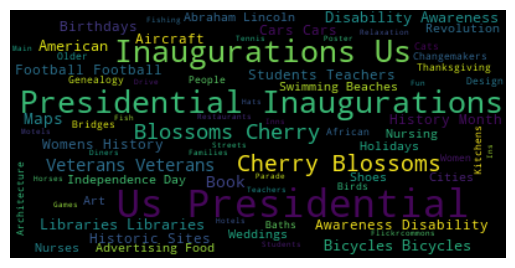

In [19]:
set_text = ""
for word in df_dc_set["Set"]:
    set_text += " " + word 
    
wordcloud = WordCloud().generate(set_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Presendential Inaguarations and Cherry Blossoms are the two set categories jumping out the most. Not surprising! Other interesting prominent categories are Bicycles, Veterans, and Students/Teachers.

Now we're starting to get the hang of it! Let's look into a few more categories.

### Resource Types

What formats show up most frequently in our DC set?

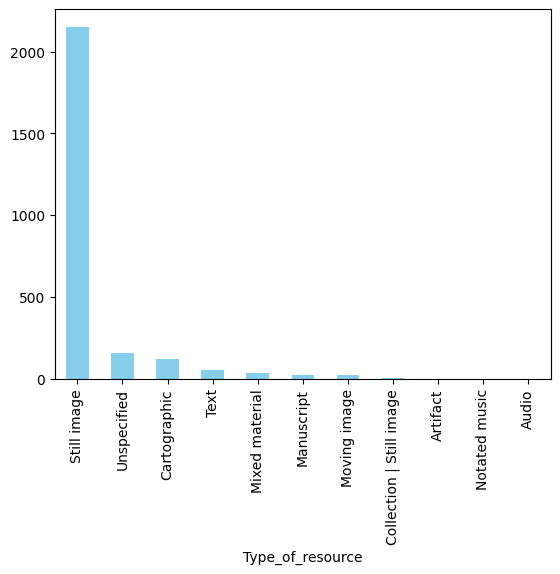

In [20]:
resource_type_counts = df['Type_of_resource'].value_counts()
resource_type_counts.plot(kind='bar', color='skyblue') 
plt.show() #over time?

As expected, it is mostly images, with some maps and manuscripts mixed in.

### Source Collection

All of the images curated in the Free to Use and Reuse collection come from different collections throughout the Library. Which are most prominent?

In [27]:
df_dc_set['Source_collection'].unique()

array([nan, 'Liljenquist Family collection (Library of Congress)',
       'American National Red Cross photograph collection (Library of Congress)',
       'Harris & Ewing photograph collection',
       'Horydczak photograph collection (Library of Congress)',
       'Farm Security Administration - Office of War Information Photograph Collection (Library of Congress)',
       'Detroit Publishing Company photograph collection (Library of Congress)',
       'Johnston, Frances Benjamin,1864-1952. Washington, D.C., school survey',
       'Farm Security Administration - Office of War Information photograph collection (Library of Congress)',
       'Toni Frissell photograph collection',
       'Highsmith, Carol M., 1946- Carol M. Highsmith Archive.',
       'CQ portion of CQ Roll Call Photograph Collection (Library of Congress)',
       'National Photo Company Collection (Library of Congress)',
       'Popular graphic art print filing series (Library of Congress)',
       'Historic American B

This data has some repeats and is a little messy. Let's make it easier to work with.

In [50]:
#manually replacing each source collection title with a simplified, shorter name for easier viewing
for index, row in df_dc_set.iterrows():
    collection = str(row["Source_collection"])  
    if "American National Red Cross" in collection:
        df_dc_set.at[index, "Source_collection"] = "American National Red Cross"
    elif "Harris & Ewing" in collection:
        df_dc_set.at[index, "Source_collection"] = "Harris & Ewing"
    elif "Horydczak" in collection:
        df_dc_set.at[index, "Source_collection"] = "Horydczak"
    elif "Farm Security Administration" in collection:
        df_dc_set.at[index, "Source_collection"] = "Farm Security Administration"
    elif "Detroit Publishing Company" in collection:
        df_dc_set.at[index, "Source_collection"] = "Detroit Publishing Company"
    elif "Johnston, Frances Benjamin" in collection:
        df_dc_set.at[index, "Source_collection"] = "Johnston, Frances Benjamin"
    elif "Toni Frissell" in collection:
        df_dc_set.at[index, "Source_collection"] = "Toni Frissell"
    elif "Carol M. Highsmith Archive" in collection:
        df_dc_set.at[index, "Source_collection"] = "Carol M. Highsmith Archive"
    elif "CQ Roll Call" in collection:
        df_dc_set.at[index, "Source_collection"] = "CQ Roll Call"
    elif "National Photo Company" in collection:
        df_dc_set.at[index, "Source_collection"] = "National Photo Company"
    elif "Popular graphic art print filing series" in collection:
        df_dc_set.at[index, "Source_collection"] = "Popular Graphic Art"
    elif "Historic American Buildings Survey" in collection:
        df_dc_set.at[index, "Source_collection"] = "Historic American Buildings Survey"
    elif "Historic American Engineering Record" in collection:
        df_dc_set.at[index, "Source_collection"] = "Historic American Engineering Record"
    elif "Liljenquist Family collection" in collection:
        df_dc_set.at[index, "Source_collection"] = "Liljenquist Family"

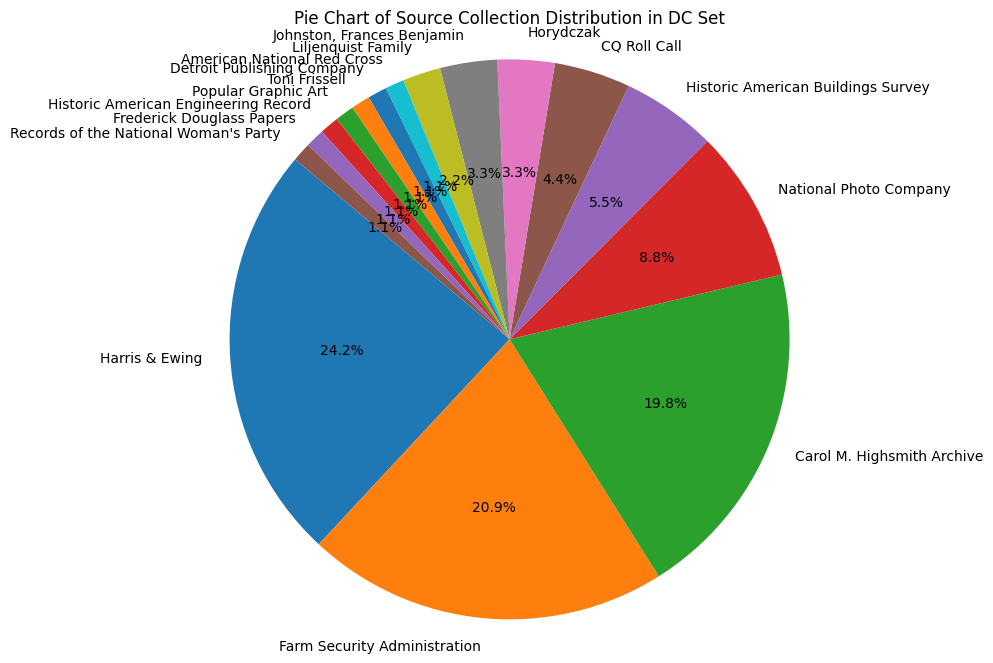

In [52]:
#pie char for collections
source_collection_counts = df_dc_set['Source_collection'].value_counts()
plt.figure(figsize=(12, 8)) #larger pie chart for easier viewing
plt.pie(source_collection_counts, labels=source_collection_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Source Collection Distribution in DC Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

As we can see, the most prominent Library collections features in our DC Set are the Harris & Ewing Collection, the Farm Security Administration Collection, the Carol M. Highsmith Archive, and the National Photo Company.

### Languages

Which languages are represented in our DC set? For this, we'll simply look at the value counts table.

In [40]:
df['Language'].value_counts()

Language
English                                             2457
English | Japanese                                    55
Latin                                                 19
French | English                                      11
Russian | English                                      9
French                                                 7
English | German                                       5
Italian                                                4
English | Not applicable | No linguistic content       3
Spanish                                                3
Flemish | Dutch                                        3
Persian                                                2
Spanish | English                                      2
Chinese                                                2
Arabic                                                 1
Italian | Latin                                        1
Latin | German                                         1
Flemish | Dutch | Fren

As expected, mostly English, but Japanese also has a significant presence, likely due to the Cherry Blossoms aspect of the images in our collection.

### Repository

Like with the Source Collection, we'll need to clean up the repository data before visualizing it.

In [53]:
print(df_dc_set['Repository'].unique())

for index, row in df_dc_set.iterrows():
    rep_str = str(row["Repository"])  
    if "Prints and Photographs" in rep_str or "Prints & Photographs" in rep_str:
        df_dc_set.at[index, "Repository"] = "Prints and Photographs Division"
    elif "Manuscripts" in rep_str:
        df_dc_set.at[index, "Repository"] = "Manuscript Division"
    elif "Motion Picture" in rep_str:
        df_dc_set.at[index, "Repository"] = "Motion Picture, Broadcasting And Recorded Sound Division"
    elif "American Folklife Center" in rep_str:
        df_dc_set.at[index, "Repository"] = "American Folklife Center"
    elif "Rare Book" in rep_str:
        df_dc_set.at[index, "Repository"] = "Rare Book And Special Collections Division"
    elif "Geography and Map" in rep_str:
        df_dc_set.at[index, "Repository"] = "Geography and Map Division"
    elif rep_str == "Library of Congress Washington, D.C. 20540 USA":
        df_dc_set.at[index, "Repository"] = "General Collection"

print(df_dc_set['Repository'].unique())


['Library of Congress Prints and Photographs Division Washington, D.C. 20540 USA'
 'Library of Congress Prints and Photographs Division Washington, D.C. 20540 USA http://hdl.loc.gov/loc.pnp/pp.print'
 'Library of Congress Geography and Map Division Washington, D.C. 20540-4650 USA dcu'
 'Library of Congress Prints and Photographs Division Washington,      D.C. 20540 USA http://hdl.loc.gov/loc.pnp/pp.print'
 nan
 'Library of Congress Prints and Photographs Division Washington, D.C. 20540 USA dcu http://hdl.loc.gov/loc.pnp/pp.print'
 'Manuscript Division'
 'Library of Congress Rare Book and Special Collections Division Washington, D.C. 20540 USA dcu']
['Prints and Photographs Division' 'Geography and Map Division' nan
 'Manuscript Division' 'Rare Book And Special Collections Division']


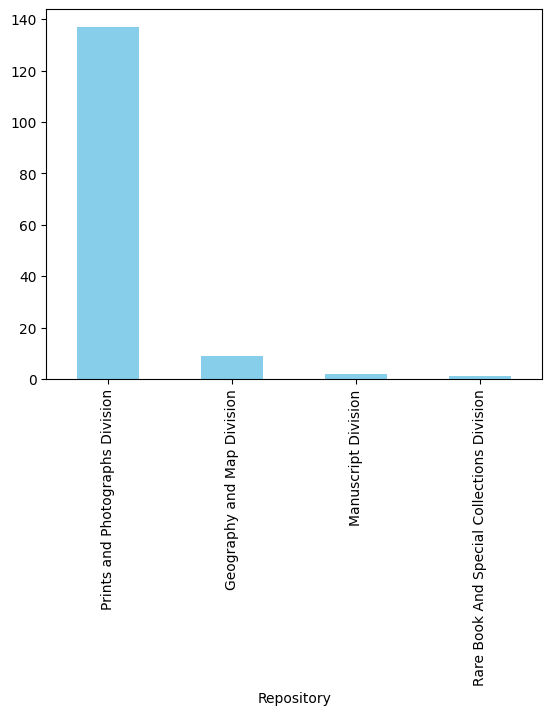

In [54]:
rep_counts = df_dc_set['Repository'].value_counts()
rep_counts.plot(kind='bar', color='skyblue') 
plt.show()

### Subjects

Lastly, let's take a quick look at what the most frequent subject tags in this collection are. Another word cloud will do nicely here.

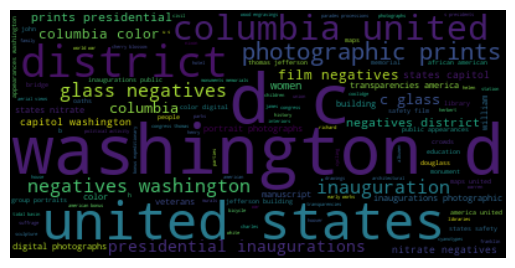

In [25]:
df_dc_set["Subjects"]
subject_text = ""
for line in df_dc_set["Subjects"]:
    words = str(line).split(" | ")
    for word in words:
        subject_text += " " + word

wordcloud = WordCloud().generate(subject_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We've successfully created a DC Set of images, organized and cleaned the metadata, and explored some metadata categories through tables and visualization. 

Now you are ready to begin your own exploration!